In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

In [36]:
def kmeans_clustering_find_clusters(scaled_features,max_labels=11):
  # A list holds the silhouette coefficients for each k
  cluster = 0
  sil = 0
  silhouette_coefficients = []
  for k in range(2, max_labels):
    kmeans = KMeans(n_clusters=k, init = "k-means++", n_init= 10, max_iter= 300, random_state= 42)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    if sil < score :
      cluster = k
      sil = score
    silhouette_coefficients.append(score)
    Output = kmeans.predict(scaled_features)
    print("For Cluster ",k)
    print("Centroids are: ",kmeans.cluster_centers_)
    print("Number of iterations are: ",kmeans.n_iter_)
    print("Labels are: ",kmeans.labels_[:5])
    print("Centroid Shape is: ",kmeans.cluster_centers_.shape)
    print("Silhoutte Score for cluster ",k," is ",score,'\n')
  plt.style.use("fivethirtyeight")
  plt.plot(range(2, 11), silhouette_coefficients)
  plt.xticks(range(2, 11))
  plt.xlabel("Number of Clusters")
  plt.ylabel("Silhouette Coefficient")
  plt.show()
  print("Finally Based on silhoutte score the cluster ",cluster," is chosen having maximum score of ",sil)
  return cluster,sil
def final_kmeans(scaled_features,cluster=2):
  print("Finally Running the kmeans with the clusters found out using silhoutte scores")
  str = ["Cluster with k=1","Cluster with k=2","Cluster with k=3","Cluster with k=4","Cluster with k=5","Cluster with k=6","Cluster with k=7","Cluster with k=8"]
  kmeans = KMeans(n_clusters=cluster, init = "k-means++", n_init= 10, max_iter= 300, random_state= 42)
  kmeans.fit(scaled_features)
  Output = kmeans.predict(scaled_features)
  print("Shape of Centroids is: ",kmeans.cluster_centers_.shape)
  x_min, x_max = scaled_features[:, 3].min() - 1, scaled_features[:, 3].max() + 1
  y_min, y_max = scaled_features[:, 6].min() - 1, scaled_features[:, 6].max() + 1
  plt.style.use("fivethirtyeight")
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))
  plt.scatter(scaled_features[:,3],scaled_features[:,6],c=Output,label=str[cluster-1])
  plt.scatter(kmeans.cluster_centers_[:,3],kmeans.cluster_centers_[:,6],s=30,c='Red',label='Centroids')
  plt.legend()
  plt.show()
  return kmeans
def kmeans_pca(scaled_features,cluster=2):
  reduced_data = PCA(n_components=2).fit_transform(scaled_features)
  kmeans = KMeans(init="k-means++", n_clusters=cluster, n_init=4)
  kmeans.fit(reduced_data)
  target = kmeans.predict(reduced_data)
  # Step size of the mesh. Decrease to increase the quality of the VQ.
  h = 0.2  
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  # Plot the decision boundary. For that, we will assign a color to each
  x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
  y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  # Obtain labels for each point in mesh. Use last trained model.
  Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.subplots(figsize=(5, 5), dpi=100)
  plt.clf()
  plt.contourf(xx, yy, Z, cmap = 'viridis',c=target)
  plt.scatter(reduced_data[:, 0], reduced_data[:, 1],c=target)
  # Plot the centroids as a white X
  centroids = kmeans.cluster_centers_
  plt.scatter(
      centroids[:, 0],
      centroids[:, 1],
      marker="+",
      s=169,
      linewidths=3,
      color="w",
      zorder=10,
  )
  plt.title("K-means clustering on the wine dataset (PCA-reduced data)\n""Centroids are marked with white +")
  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$')
  plt.show()
def gausianmixturemodel(scaled_features,cluster=2):
  kmeans = KMeans(n_clusters=cluster, init = "k-means++", n_init= 10, max_iter= 300, random_state= 42)
  kmeans.fit(scaled_features)
  Output = kmeans.predict(scaled_features)
  str = ["Cluster with k=1","Cluster with k=2","Cluster with k=3","Cluster with k=4","Cluster with k=5","Cluster with k=6","Cluster with k=7","Cluster with k=8"]
  gm_diag = GaussianMixture(n_components=cluster, random_state=0,covariance_type='diag',init_params='kmeans',means_init=kmeans.cluster_centers_)
  gm_full = GaussianMixture(n_components=cluster, random_state=0,covariance_type='full',init_params='kmeans',means_init=kmeans.cluster_centers_)
  gm_identity = GaussianMixture(n_components=cluster, random_state=0,covariance_type='tied',init_params='kmeans',means_init=kmeans.cluster_centers_)
  gm_diag.fit(scaled_features)
  target = gm_diag.predict(scaled_features)
  correct_labels = sum(y_true == target)
  print(y_true)
  print(target)
  print(correct_labels)
  print("Error Percentage is: ",correct_labels/X.shape[0]*100)
  plt.subplots(figsize=(5, 5), dpi=100)
  plt.scatter(scaled_features[:,3],scaled_features[:,6],c=target,label=str[cluster-1])
  plt.scatter(gm_diag.means_[:,3],gm_diag.means_[:,6],c="Red",label="Means")
  plt.legend()
  plt.show()
  print(kmeans.cluster_centers_)
  print(gm_diag.means_)
  gm_full.fit(scaled_features)
  target = gm_full.predict(scaled_features)
  correct_labels = sum(y_true == target)
  print(y_true)
  print(target)
  print(correct_labels)
  print("Error Percentage is: ",correct_labels/X.shape[0]*100)
  plt.subplots(figsize=(5, 5), dpi=100)
  plt.scatter(scaled_features[:,3],scaled_features[:,6],c=target,label=str[cluster-1])
  plt.scatter(gm_full.means_[:,3],gm_full.means_[:,6],c="Red",label="Means")
  plt.legend()
  plt.show()
  print(kmeans.cluster_centers_)
  print(gm_full.means_)
  gm_identity.fit(scaled_features)
  target = gm_identity.predict(scaled_features)
  correct_labels = sum(y_true == target)
  print(y_true)
  print(target)
  print(correct_labels)
  print("Error Percentage is: ",correct_labels/X.shape[0]*100)
  plt.subplots(figsize=(5, 5), dpi=100)
  plt.scatter(scaled_features[:,3],scaled_features[:,6],c=target,label=str[cluster-1])
  plt.scatter(gm_identity.means_[:,3],gm_identity.means_[:,6],c="Red",label="Means")
  plt.legend()
  plt.show()
  print(kmeans.cluster_centers_)
  print(gm_identity.means_)
  

In [4]:
#X, y_true = make_blobs(n_samples=500, centers=8,cluster_std=0.60, random_state=0)
df = pd.read_csv("Wine.csv")
print(df.info(),'\n')
print(df.describe,'\n')
print(df.head(),'\n')
print(df.shape,'\n')
print(df.isnull().sum(),'\n')
print(df.columns,'\n')
#plt.scatter(X[:, 0], X[:, 1], s=50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None 

<bound method NDFram

In [ ]:
#df.drop(['Column1','Column2','Column3','Column4'],axis=1,inplace=True)
#df.drop(['status_id','status_published'],axis=1,inplace=True)

In [5]:
c ='Customer_Segment'
print(df[c].unique())
#le = LabelEncoder()
#df[c] = le.fit_transform(df[c])
X = df.values
y_true = df[c]
print(df.info())
print(X)
print(y_true)

[1 2 3]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
[[1.423e+01 1.

In [6]:
print(X[:5])
print(y_true[:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03 1.000e+00]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03 1.000e+00]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03 1.000e+00]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03 1.000e+00]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02 1.000e+00]]
0    1
1    1
2    1
3    1
4    1
Name: Customer_Segment, dtype: int64


In [14]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
print(scaled_features[:5])

[[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522  0.80899739
   1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728  1.84791957
   1.01300893 -1.21394365]
 [ 0.24628963 -0.49941338 -0.82799632 -2.49084714  0.01814502  0.56864766
   0.73362894 -0.82071924 -0.54472099 -0.29332133  0.40605066  1.1134493
   0.96524152 -1.21394365]
 [ 0.19687903  0.02123125  1.10933436 -0.2687382   0.08835836  0.80899739
   1.21553297 -0.49840699  2.13596773  0.26901965  0.31830389  0.78858745
   1.39514818 -1.21394365]
 [ 1.69154964 -0.34681064  0.4879264  -0.80925118  0.93091845  2.49144552
   1.46652465 -0.98187536  1.03215473  1.18606801 -0.42754369  1.18407144
   2.33457383 -1.21394365]
 [ 0.29570023  0.22769377  1.84040254  0.45194578  1.28198515  0.80899739
   0.66335127  0.22679555  0.40140444 -0.31927553  0.36217728  0.44960118
  -0.03787401 -1.21394365]]


For Cluster  2
Centroids are:  [[-0.07297886  0.66451047  0.18987553  0.51662255 -0.15468782 -0.94370681
  -1.04663574  0.83794915 -0.71615568  0.54346866 -0.88207198 -1.06931809
  -0.45318098  1.0354587 ]
 [ 0.04197899 -0.38224053 -0.10922044 -0.29717226  0.08897972  0.5428402
   0.60204711 -0.48200615  0.41194796 -0.31261472  0.50738654  0.61509448
   0.26067933 -0.59561784]]
Number of iterations are:  8
Labels are:  [1 1 1 1 1]
Centroid Shape is:  (2, 14)
Silhoutte Score for cluster  2  is  0.2861665011841207 

For Cluster  3
Centroids are:  [[ 0.18654314  0.90497145  0.24921026  0.58370348 -0.05063539 -0.988557
  -1.23619475  0.71684172 -0.74960756  0.98849829 -1.19129878 -1.30153966
  -0.38004461  1.34745816]
 [ 0.87809728 -0.30457633  0.31894179 -0.66452366  0.56488825  0.87650546
   0.94363903 -0.58558981  0.58178294  0.16718842  0.48372814  0.76705349
   1.15834713 -1.17152057]
 [-0.9221257  -0.3788889  -0.46568753  0.17550695 -0.47025072 -0.07393442
   0.04428767  0.0087608   

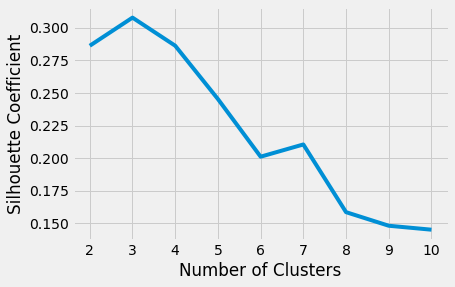

Finally Based on silhoutte score the cluster  3  is chosen having maximum score of  0.30773604383565206
3 0.30773604383565206
Finally Running the kmeans with the clusters found out using silhoutte scores
Shape of Centroids is:  (3, 14)


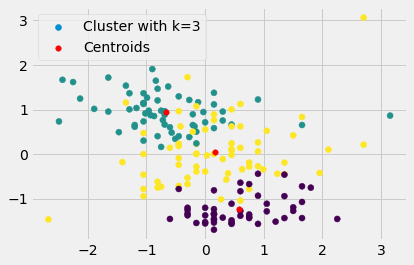

In [27]:
cluster,sil = kmeans_clustering_find_clusters(scaled_features,11)
print(cluster,sil)
km = final_kmeans(scaled_features,cluster)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: UserWarning: The following kwargs were not used by contour: 'c'


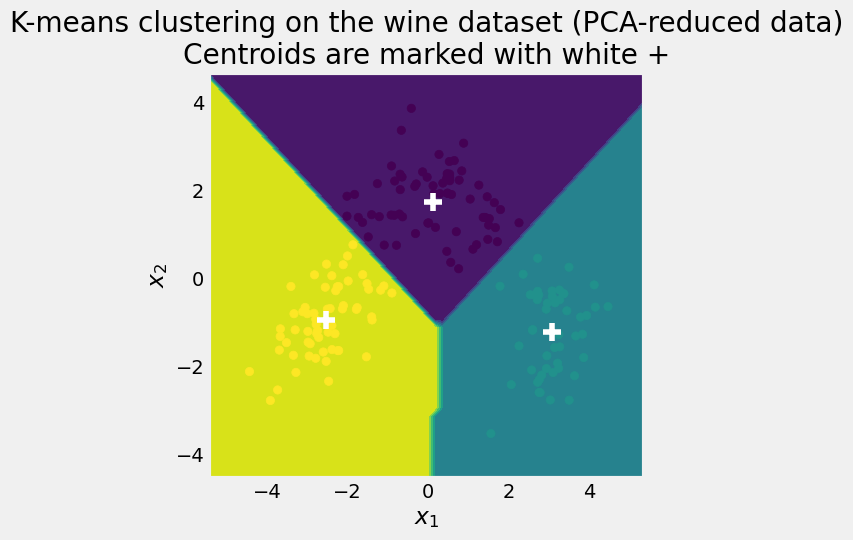

In [30]:
kmeans_pca(scaled_features,cluster)

In [ ]:
print(Output)
print(y_true)
correct_labels = sum(y_true == kmeans.labels_)
print(correct_labels)
num = 0
for i in range(X.shape[0]):
  if y_true[i]!=Output[i]:
    num = num + 1
print("Error Percentage is: ",num/X.shape[0]*100)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Customer_Segment, Length: 178, dtype: int64
127
Error Percentage is:  28.651685393258425


0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Customer_Segment, Length: 178, dtype: int64
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
130
Error Percentage is:  73.03370786516854


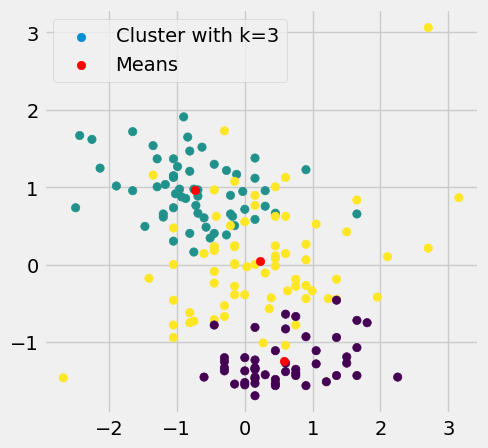

[[ 0.18654314  0.90497145  0.24921026  0.58370348 -0.05063539 -0.988557
  -1.23619475  0.71684172 -0.74960756  0.98849829 -1.19129878 -1.30153966
  -0.38004461  1.34745816]
 [ 0.87809728 -0.30457633  0.31894179 -0.66452366  0.56488825  0.87650546
   0.94363903 -0.58558981  0.58178294  0.16718842  0.48372814  0.76705349
   1.15834713 -1.17152057]
 [-0.9221257  -0.3788889  -0.46568753  0.17550695 -0.47025072 -0.07393442
   0.04428767  0.0087608   0.01826487 -0.86227808  0.42450329  0.24978206
  -0.76524984  0.07996036]]
[[ 0.18915862  0.89533073  0.25794454  0.57706453 -0.03012665 -0.98761685
  -1.25276105  0.6901194  -0.76628663  1.01141787 -1.20538229 -1.31094994
  -0.37257757  1.37386437]
 [ 0.91919498 -0.29234227  0.32560449 -0.73799712  0.4632262   0.87336224
   0.95688391 -0.57898505  0.54038332  0.20340098  0.45884745  0.77135086
   1.17450054 -1.21394365]
 [-0.89171997 -0.36236171 -0.44495778  0.22313708 -0.36456713 -0.05806709
   0.05177999  0.01456883  0.069002   -0.85279882  0

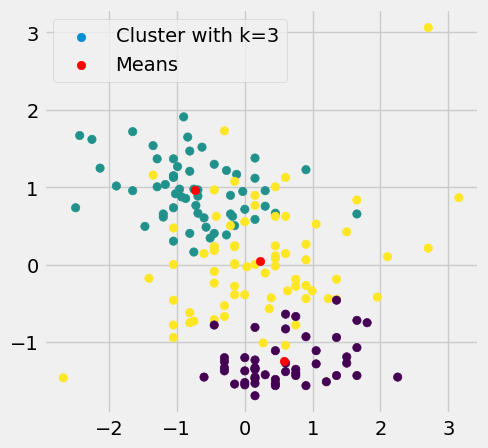

[[ 0.18654314  0.90497145  0.24921026  0.58370348 -0.05063539 -0.988557
  -1.23619475  0.71684172 -0.74960756  0.98849829 -1.19129878 -1.30153966
  -0.38004461  1.34745816]
 [ 0.87809728 -0.30457633  0.31894179 -0.66452366  0.56488825  0.87650546
   0.94363903 -0.58558981  0.58178294  0.16718842  0.48372814  0.76705349
   1.15834713 -1.17152057]
 [-0.9221257  -0.3788889  -0.46568753  0.17550695 -0.47025072 -0.07393442
   0.04428767  0.0087608   0.01826487 -0.86227808  0.42450329  0.24978206
  -0.76524984  0.07996036]]
[[ 0.18915862  0.89533073  0.25794454  0.57706453 -0.03012665 -0.98761685
  -1.25276105  0.6901194  -0.76628663  1.01141787 -1.20538229 -1.31094994
  -0.37257757  1.37386437]
 [ 0.91919498 -0.29234227  0.32560449 -0.73799712  0.4632262   0.87336224
   0.95688391 -0.57898505  0.54038332  0.20340098  0.45884745  0.77135086
   1.17450054 -1.21394365]
 [-0.89171997 -0.36236171 -0.44495778  0.22313708 -0.36456713 -0.05806709
   0.05177999  0.01456883  0.069002   -0.85279882  0

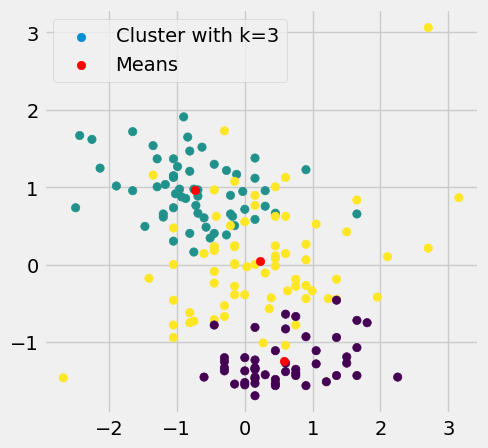

[[ 0.18654314  0.90497145  0.24921026  0.58370348 -0.05063539 -0.988557
  -1.23619475  0.71684172 -0.74960756  0.98849829 -1.19129878 -1.30153966
  -0.38004461  1.34745816]
 [ 0.87809728 -0.30457633  0.31894179 -0.66452366  0.56488825  0.87650546
   0.94363903 -0.58558981  0.58178294  0.16718842  0.48372814  0.76705349
   1.15834713 -1.17152057]
 [-0.9221257  -0.3788889  -0.46568753  0.17550695 -0.47025072 -0.07393442
   0.04428767  0.0087608   0.01826487 -0.86227808  0.42450329  0.24978206
  -0.76524984  0.07996036]]
[[ 0.18915862  0.89533073  0.25794454  0.57706453 -0.03012665 -0.98761685
  -1.25276105  0.6901194  -0.76628663  1.01141787 -1.20538229 -1.31094994
  -0.37257757  1.37386437]
 [ 0.91919498 -0.29234227  0.32560449 -0.73799712  0.4632262   0.87336224
   0.95688391 -0.57898505  0.54038332  0.20340098  0.45884745  0.77135086
   1.17450054 -1.21394365]
 [-0.89171997 -0.36236171 -0.44495778  0.22313708 -0.36456713 -0.05806709
   0.05177999  0.01456883  0.069002   -0.85279882  0

In [37]:
gausianmixturemodel(scaled_features,cluster)